# Regressão Logística

## Introdução
Um problema de classificação é quando queremos categorizar alguma variável por classes. Nesse caso, a varável $\pmb{y}$ que queremos prever é discreta. Um exemplo seria saber se uma pessoa ganha mais de R$ 50000 anuais, com base nas suas informações socioeconômicas, ou saber se uma pessoa pedindo crédito em um banco vai pagar o que deverá corretamente.

Como exemplo ilustrativo, vamos supor que somos uma agência de seguros e estamos decidindo se devemos ou não segurar o carro, com base nas informações sociais dos seus donos. Por motivos de simplicidade, vamos dizer que a probabilidade da pessoa bater o carro só dependa do tempo que ela gastou na autoescola; nós temos acesso à esse tempo, mas não sabemos exatamente como ele se relaciona com a probabilidade da pessoas segurada sofrer um acidente automobilístico.

Nós então olhamos no nosso arquivo o caso de 15 pessoas, onde temos tanto os dados de tempo na autoescola e se elas sofreram ou não acidente. Se nós colocarmos nossos dados em um gráfico (x, y) ele seria mais ou menos da seguinte forma:

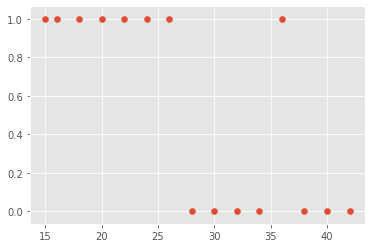

In [21]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from matplotlib import pyplot as plt, style
from IPython import display

style.use('ggplot')
np.random.seed(2)

x = np.linspace(15,42,15).astype(int)
y_logit = x*-0.5 + 15 + np.random.normal(0,1.5, x.shape)
y = np.round(np.exp(y_logit) / (np.exp(y_logit) + 1), 0)

plt.scatter(x, y)
plt.show()

Nós podemos ver então que a maioria das pessoas que sofreram um acidente de carro passaram pouco tempo na autoescola. Mas nós queremos mais do que isso. Queremos algum modelo capaz de prever a probabilidade da pessoa sofrer um acidente com base no tempo que durou a autoescola dela.

Uma forma ingênua de resolver esse problema seria utilizar regressão linear. Para tomar uma decisão de segurar ou não o carro, poderíamos então um limiar: só iremos segurar pessoas cuja previsão de acidente for menos de 0.5. A linha que melhor se ajusta aos dados seria então mais ou menos assim:

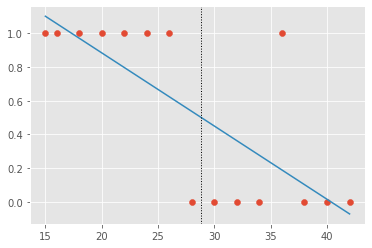

In [3]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()


Nesse caso, utilizar regressão linear e estabelecer um limiar funcionaria muito bem! Se colocássemos o nosso limiar em 0.5, preveríamos que todos à direita da curva pontilhada não sofreriam um acidente e erraríamos em apenas dois casos. 

No entanto, suponha agora que nos nossos dados haja uma pessoa com muitas horas de autoescola. Digamos, umas 100 horas. Essa pessoa não sofreu nenhum acidente e de certa forma ter ela nos dados não traz muita informação nova: ela foi tão treinada que dificilmente preveríamos que sofreria um acidente.

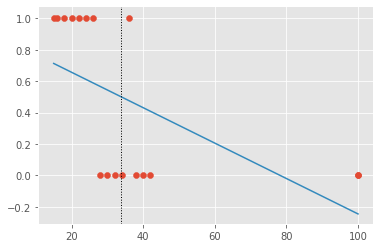

In [14]:
x_ = np.array([[100]])
y_ =  x_*-0.5 + 15 + np.random.normal(0,1.5, 1)
y_ = np.round(np.exp(y_) / (np.exp(y_) + 1), 0)

x = np.append(x, x_)
y = np.append(y, y_)

regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()

No entanto, essa pessoa super treinada faz com que nossa linha de regressão seja puxada para a direita, fazendo com que classifiquemos muitas das pessoas de baixo risco como tendo alta probabilidade de sofrerem acidentes. Podemos ver mais um comportamento estranho com o algoritmo de regressão linear: para pessoas com mais de 70 horas de autoescola, ele está prevendo uma probabilidade negativa de acidente, o que simplesmente não tem sentido.

Para resolver isso, em vez de utilizar regressão linear, vamos utilizar a regressão logística sempre que nos depararmos com problemas de classificação. Regressão logística nos fornecerá uma previsão sempre entre 0 e 1, de forma que possamos interpretar seus resultados como uma probabilidade válida. Além disso, regressão logística não será influenciada por outliers que não fornecem muita informação nova, pois a atenção do algoritmo será concentrada na região de fronteira.

A intuição por trás de regressão logística é bastante simples: em vez de acharmos a reta que melhor se ajusta aos dados, vamos achar uma curva em formato de 'S' que melhor se ajusta aos dados:

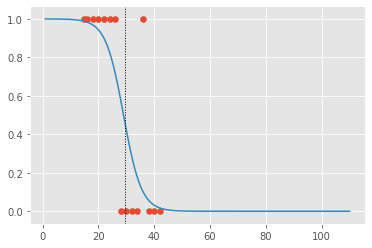

Acurácia: 0.867
Os parâmetros do modelos são: 9.064, -0.312



In [80]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1e7)
clf.fit(x.reshape(-1,1), y)

def model(x):
    return 1 / (1 + np.exp(-x))

line = np.linspace(1, 110, 500)
line = model(line * clf.coef_ + clf.intercept_).ravel()

plt.scatter(x, y)
plt.plot(np.linspace(1, 110, 500), line, c='C1')
plt.axvline(x=0.5 - (clf.intercept_/clf.coef_), c='k', ls='dotted', lw=1)
plt.show()

print('Acurácia: %.3f' % clf.score(x.reshape(-1,1), y))
print('Os parâmetros do modelos são: %.3f, %.3f' % (clf.intercept_, clf.coef_))
print('')


# Justificativa matemática

Para implementar regressão logística, precisamos de apenas duas modificações ao algoritmo de regressão linear. Em primeiro lugar, precisamos utilizar uma função achatamento após a transformação linear, de forma que o valor previsto pelo modelo possa ser interpretado como uma probabilidade (lembre que estamos tentando modelar uma variável binária, então queremos saber a probabilidade dela ser 0 ou 1). A função de achatamento que vamos utilizar é a função logística, ou sigmoide:
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

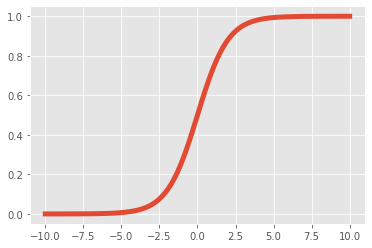

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
plt.plot(np.linspace(-10,10,100), sigmoid(np.linspace(-10,10,100)), lw=5)
plt.show()

O que a função sigmoide faz é simplesmente converter o score produzido pela transformação linear $\pmb{X}\pmb{\hat{w}}$ em uma probabilidade, de forma que quanto maior o score, maior a probabilidade prevista e vice versa. Agora, podemos utilizar 0.5 como um limiar, da mesma forma que havíamos feito com a nossa solução ingênua utilizando regressão linear. A vantagem agora é que, além da previsão ser uma probabilidade válida, a regressão logística não é sensível ao pontos com scores muito altos ou muito baixos. 

Lembre-se de como com regressão linear tínhamos um modelo na forma $\pmb{y}=\pmb{X}\pmb{w} + \pmb{\epsilon}$, de forma que nossas previsões eram da forma $\pmb{\hat{y}}=\pmb{X}\pmb{\hat{w}}$. Agora, com regressão logística, nosso modelo fica:

$$\pmb{y}=\sigma(\pmb{X}\pmb{w} + \pmb{\epsilon})$$

De forma que nossas previsões serão uma probabilidade resultado de $\pmb{\hat{y}}=\sigma(\pmb{X}\pmb{\hat{w}})$. Novamente, nosso objetivo será aprender os parâmetros $\pmb{\hat{w}}$ de forma a minimizar uma função custo. 

A segunda modificação que devemos fazer no algoritmo de regressão linear é alterar a função custo. Agora, em vez de tentarmos minimizar a distância entre o valor previsto e o observado, nós vamos minimizar a **entropia cruzada**:

$$L=\begin{cases} 
-log(\hat{y}) & se \space y=1\\
-log(1-\hat{y}) & se \space y=0\\
\end{cases}$$

Para entender essa função custo, vamos analisar cada caso separadamente. Se $y=1$ e $\hat{y}=1$, $-log(\hat{y})=0$. No entanto, quanto mais $\hat{y}$ se aproxima de 0, $-log(\hat{y})$ cresce exponencialmente para o infinito. Por outro lado, se $y=0$ e $\hat{y}=0$, podemos ver que $-log(1-\hat{y})=0$. Mas $-log(1-\hat{y})=0$ vai para o infinito conforme $\hat{y}$ se distancia de $0$. Nós podemos resumir a função custo de entropia cruzada da seguinte forma:

$$L=\sum -y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

Nós podemos então substituir $\hat{y}$ por $\sigma(\pmb{X}\pmb{w})$ e diferenciar $L$ com respeito aos parâmetros:

$$\frac{\partial L}{\partial w_j}=\sum \Big(\frac{y}{\sigma(\pmb{x}_i \pmb{w})} - \frac{(1-y)}{1-\sigma(\pmb{x}_i \pmb{w})} \Big) \frac{\partial\sigma(\pmb{x}_i \pmb{w})}{\partial \pmb{w}}$$

Como é bastante entediante e desnecessário realizar o passo à passo dessa derivada, vamos pular direto par o resultado, que é incrivelmente simples:

$$\frac{\partial L}{\partial w_j}=\sum x_i(\sigma(\pmb{x}_i \pmb{w}) - y)=\sum x_i(\hat{y} - y)$$

E terminamos. Já temos toda a informação necessária para implementar uma regressão logística: bastará atualizar os parâmetros $\pmb{\hat{w}}$ iterativamente com gradiente descendente.

## Implementação
Nossa implementação de regressão logística será extremamente similar à de regressão linear com gradiente descendente. A única modificação será na atualização do gradiente, que utilizara as derivadas computadas acima.

In [122]:
# Implementação própria
class logistic_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=100):
        self.learning_rate = learning_rate # taxa de aprendizado
        self.training_iters = training_iters # iterações de treino
        
    
    def _logistic(self, X):
        '''Função logística'''
        return  1 / (1 + np.exp(-np.dot(X, self.w_hat)))
    
    
    def fit(self, X_train, y_train):
        
        # formata os dados
        X = X_train.reshape(-1,1) if len(X_train.shape) < 2 else X_train
        X = np.insert(X, 0, 1, 1)
               
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,1, size = X[0].shape)
        
        # loop de treinamento
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for var in range(len(gradient)):
                gradient[var] += np.dot((self._logistic(X) - y_train), X[:,var])
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado

            # atualiza os parâmetros
            self.w_hat -= gradient
            
            
    def predict(self, X_test):
        
        # formata os dados
        if len(X_test.shape) < 2:
            X = X_test.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # aplica função logística
        logit = self._logistic(X) 
        
        # aplica limiar
        return np.greater_equal(logit, 0.5).astype(int)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

regr = logistic_regr(learning_rate=0.001, training_iters=90000)
regr.fit(x, y)
y_hat = regr.predict(x)
print('Acurácia: ', np.mean(np.equal(y_hat, y)))
print('Os parâmetros do modelos são: %.3f, %.3f' % (regr.w_hat[0], regr.w_hat[1]))
print('relatório', classification_report(y, y_hat))
print('matriz de confusão\n', confusion_matrix(y, y_hat))
print('MAE:', metrics.mean_absolute_error(y, y_hat))
print('MSE:', metrics.mean_squared_error(y, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_hat)))

print("\n\n\nBiblioteca de mercado sklearn")

clf = LogisticRegression(C=1e7)
clf.fit(x.reshape(-1,1), y)
predicoes = clf.predict(x.reshape(-1,1))
print('Acurácia da biblioteca LogisticRegression do SKLearn : ', np.mean(np.equal(predicoes, y)))
print('relatório', classification_report(y, predicoes))
print('matriz de confusão\n', confusion_matrix(y, predicoes))
print('MAE Mean absolute error:', metrics.mean_absolute_error(y, predicoes))
print('MSE Mean Squared Error:', metrics.mean_squared_error(y, predicoes))
print('RMSE Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y, predicoes)))

Acurácia:  0.8666666666666667
Os parâmetros do modelos são: 9.035, -0.311
relatório               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

matriz de confusão
 [[6 1]
 [1 7]]
MAE: 0.13333333333333333
MSE: 0.13333333333333333
RMSE: 0.3651483716701107



Biblioteca de mercado sklearn
Acurácia da biblioteca LogisticRegression do SKLearn :  0.8666666666666667
relatório               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

matriz de confusão
 [[6 1]
 [1 7]]

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

print("\n\nImplementação própria")
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.25, 
                                                    random_state=101)

regr = logistic_regr(learning_rate=0.001, training_iters=90000)
regr.fit(X_train, y_train)
predicoes_y_hat = regr.predict(X_test)
print('relatório', classification_report(y_test, predicoes_y_hat))
print('matriz de confusão\n', confusion_matrix(y, y_hat))
print('MAE:', metrics.mean_absolute_error(y_test, predicoes_y_hat))
print('MSE:', metrics.mean_squared_error(y_test, predicoes_y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicoes_y_hat)))

print("\n\n\nBiblioteca de mercado sklearn")
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), 
                                                    y, test_size=0.25, 
                                                    random_state=101)
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicoes = clf.predict(X_test)
print('relatório', classification_report(y_test, predicoes))
print('matriz de confusão\n', confusion_matrix(y_test, predicoes))
print('MAE Mean absolute error:', metrics.mean_absolute_error(y_test, predicoes))
print('MSE Mean Squared Error:', metrics.mean_squared_error(y_test, predicoes))
print('RMSE Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predicoes)))



Implementação própria
relatório               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

matriz de confusão
 [[6 1]
 [1 7]]
MAE: 0.0
MSE: 0.0
RMSE: 0.0



Biblioteca de mercado sklearn
relatório               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

matriz de confusão
 [[2 0]
 [0 2]]
MAE Mean absolute error: 0.0
MSE Mean Squared Error: 0.0
RMSE Root Mean Square Error: 0.0


Nós podemos ver que a nossa implementação aprendeu parâmetros muito similares aos obtidos acima com uma regressão logística de mercado. Além disso, nosso modelo também tem uma acurácia de 86,66%, o que mostra que provavelmente não erramos nada. No entanto, nossa implementação é bem mais lenta do que a de mercado.

Para melhorar isso, poderíamos implementar alguma melhoria no algoritmo de otimização,como utilizar GDE com momento. Como isso seria demasiadamente preditivo, vamos parar por aqui. Afinal, na prática, basta utilizar um algoritmo de regressão logística pronto que não precisaremos nos preocupar com esses detalhes.